In [19]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#from datetime import datetime

### Data Extration

In [4]:
trans = pd.read_csv("./dados/trans_dev.csv", sep=";", low_memory=False); # see here


In [5]:
trans.columns

Index(['trans_id', 'account_id', 'date', 'type', 'operation', 'amount',
       'balance', 'k_symbol', 'bank', 'account'],
      dtype='object')

### Descriptive statistics summary

#### Type

In [6]:
trans['type'].describe()

count         396685
unique             3
top       withdrawal
freq          232093
Name: type, dtype: object

<AxesSubplot:>

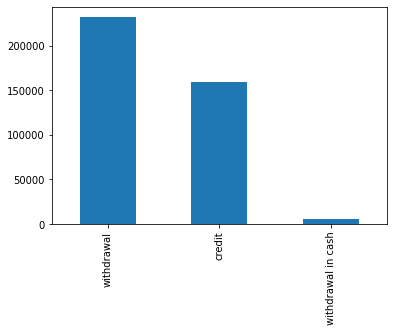

In [13]:
trans['type'].value_counts().plot(kind='bar')

#### Operation

In [8]:
trans['operation'].describe()

count                 325924
unique                     5
top       withdrawal in cash
freq                  165270
Name: operation, dtype: object

<AxesSubplot:>

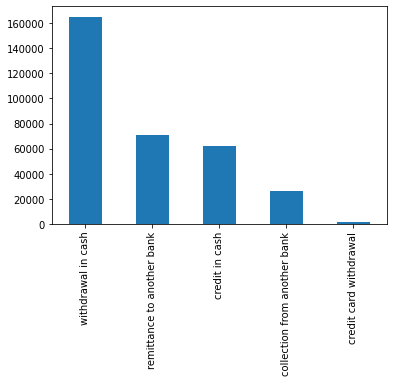

In [14]:
trans['operation'].value_counts().plot(kind='bar')


#### Amount

In [7]:
trans['amount'].describe()


count    396685.000000
mean       5677.552980
std        9190.364137
min           0.000000
25%         127.500000
50%        1952.000000
75%        6500.000000
max       86400.000000
Name: amount, dtype: float64

In [15]:
trans['amount'].value_counts().plot(kind='bar')


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fc2147a55f0> (for post_execute):


KeyboardInterrupt: 

#### k_symbol

In [9]:
trans['k_symbol'].describe()


count                211441
unique                    7
top       interest credited
freq                  70761
Name: k_symbol, dtype: object

#### Bank

In [10]:
trans['bank'].describe()


count     97242
unique       13
top          ST
freq       8114
Name: bank, dtype: object

### Statistical Graphics 

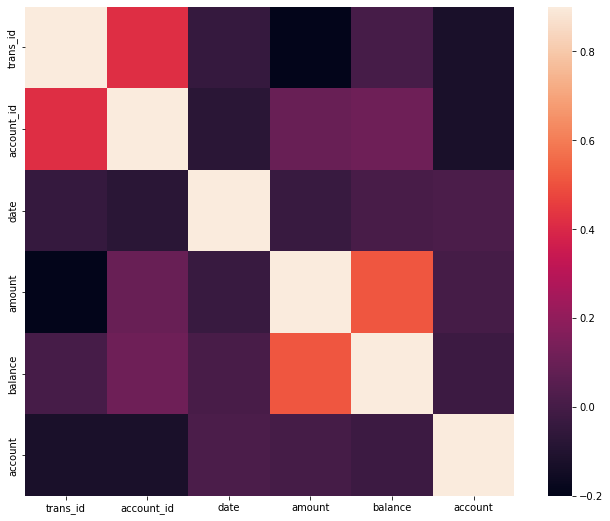

In [20]:
corrmat = trans.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9, square=True);

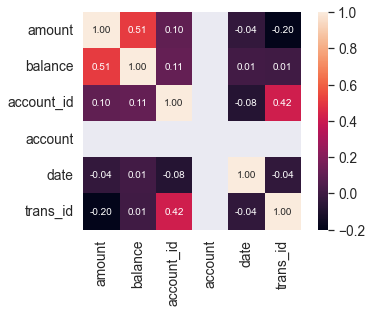

In [21]:
k = 10 # number of variables for heatmap
cols = corrmat.nlargest(k, 'amount')['amount'].index
cm = np.corrcoef(df_trans_dev[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Missing data 

In [22]:
total = df_trans_dev.isnull().sum().sort_values(ascending=False)
percent = (df_trans_dev.isnull().sum()/df_trans_dev.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
bank,299443,0.754863
account,294456,0.742292
k_symbol,185244,0.466980
operation,70761,0.178381
trans_id,0,0.000000
account_id,0,0.000000
date,0,0.000000
type,0,0.000000
amount,0,0.000000
balance,0,0.000000
